# **Lucas Buk Cardoso RA: 20.84113-2**

# **Enunciado do problema**

Vamos lá... Segue o enunciado do problema: temos um dataset (`Dados de custo de casas.csv`), onde temos informações/descrições de casas e seus respectivos custos. São cerca de 80 colunas de informações, i.e. 80 features. Queremos desenvolver um modelo de Machine Learning, utilizando TODAS as etapas clássicas do CRISP, e TODAS as colunas de feature.

Seu modelo deve receber como entrada as colunas da imagem acima, e classificar se o apartamento custa mais ou menos que $220.000,00. O modelo consiste desde o preprocessamento dos dados, até a classificação. Isso significa que seu modelo deve receber as informações acima, em seu estado primário (como no .csv) e deve processar os dados e fazer a classificação de forma transparente para o usuário.

**Observações importantes** 

Note, você deve aplicar corretamente todas as técnicas de processamento necessárias para as colunas do dataset. Vocês não poderão utilizar ferramentas consideradas como low-code e auto processamento neste trabalho.

Note, o modelo deve ser devidamente avaliado utilizando técnicas apropriadas de avaliação. Vocês não poderão utilizar ferramentas consideradas como low-code e auto machine learning neste trabalho.


**Entrega**

O trabalho deve ser entregue em Jupyter Notebook com as etapas do CRISP bem definidas. Deve conter um exemplo de como enviar dados para o seu modelo para fazer a classificação.
 
IMPORTANTE: essa etapa deve ser simples de ser executada e deve seguir o descrito na parte final do enunciado ("seu modelo deve receber as informações acima, em seu estado primário (como no .csv) e deve processar os dados e fazer a classificação de forma transparente para o usuário.").
 
Além disso deve ser entregue o arquivo requirements.txt com todas as bibliotecas e versões utilizadas em seu projeto, informando também, qual a versão do Python foi utilizada na primeira linha do arquivo como comentário. Isso significa que se eu criar um ambiente Python novo com anaconda, utilizando a versão do Python que você descreveu, instalar as somente as bibliotecas descritas no seu arquivo requirements.txt, eu devo ser capaz de rodar o seu código DE PRIMEIRA! Se o seu código não funcionar, você será penalizado.
 
**A data de entrega será até o dia 22 de Abril de 2021, daqui 21 dias.**
 
Será entregue via email: marcelo.lima@maua.br, ou via Teams. O email/mensagem deve ter o título: Mineração de Dados - Primeiro Trabalho. No email/mensagem deve constar seu nome, seu RA, e seu trabalho em formato .zip com o arquivo Notebook com sua solução, e com o arquivo requirements.txt.


**Dados**

Os dados para o trabalho estão no arquivo anexado: Dados de custo de casas.csv

## Instalação requirements.txt

In [1]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# **Aquisição de Dados**
---

Leitura dos dados do custo de casas

In [1]:
import pandas as pd

df = pd.read_csv('../data/01_raw/Dados de custo de casas.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.shape

(1460, 81)

# **Análise do dataframe**
___

Análise dos tipos das variáveis do problema, da quantidade de valores faltantes e das correlações entre as variáveis

In [3]:
df.dtypes[:45]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

In [4]:
df.dtypes[45:]

LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

### Valores faltantes

In [5]:
df.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

### Correlação das variáveis

In [6]:
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

c:\users\lucas\anaconda3\envs\housepricing\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


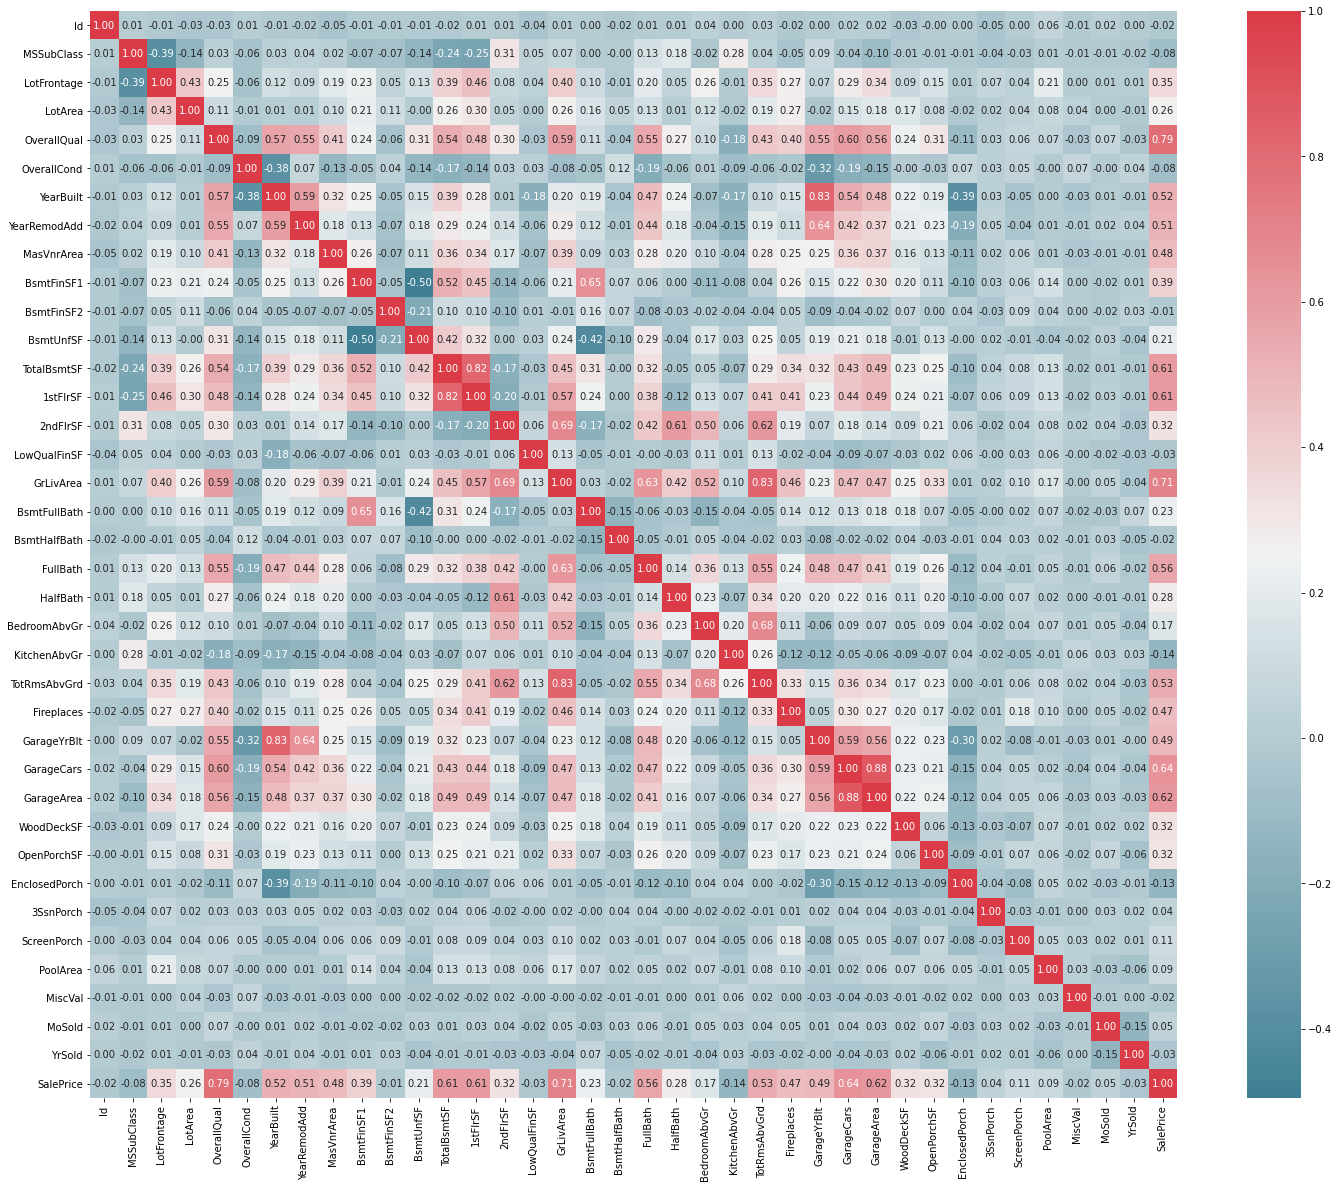

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = corr_matrix

fig, ax = plt.subplots(figsize = (25,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(correlations, cmap = colormap, annot = True, fmt = '.2f', square=True)
fig.show()

### **Variáveis categóricas**

Separação das variáveis categóricas do dataset

In [8]:
# Retorno dos categóricos
categoricos = df.select_dtypes(include='object').columns
categoricos

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
df[categoricos].isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

### **Variáveis numéricas**

Separação das variáveis numéricas do dataset

In [10]:
# Retorno dos numéricos
numericos = df.select_dtypes(exclude='object').columns
numericos

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df[numericos].isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
dtype: int64

# **Pré-processamento**
---

### **Remoção dos valores nulos**

> Para as variáveis categóricas será colocado no lugar dos valores faltantes 'Sem informação', assim é considerada como uma categoria diferente das já existentes naquelas variáveis

In [14]:
df[categoricos] = df[categoricos].fillna('Sem informação')

> Para as variáveis numéricas será colocado no lugar dos valores faltantes somente 0

In [15]:
df[numericos] = df[numericos].fillna(0)

### **One hot encoder**

Algumas variáveis categóricas possuem algumas categorias com somente um exemplo para todo o conjunto de dados, por isso nelas será feito o One Hot Encoder, evitando problemas com treinamento e teste.

In [16]:
# Colunas que serão realizadas o One Hot Encoder
onehot = ['Utilities', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
          'ExterCond', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'MiscFeature']

In [17]:
from sklearn.preprocessing import OneHotEncoder

ohe = dict()
for col in onehot:
    ohe[col] = OneHotEncoder()
    ohe_results = ohe[col].fit_transform(df[[col]])
    df_aux = pd.DataFrame(ohe_results.toarray(), columns=ohe[col].categories_, index=df[col].index)
    df = df.merge(df_aux, how='left', left_index=True, right_index=True)

In [18]:
# Drop das colunas originais
df.drop(columns=onehot, inplace=True)
df.shape

(1460, 153)

### **Separação em treino e teste**

Separação dos dados em treino e teste para realizar os treinamentos e as validações dos modelos de machine learning

In [31]:
# Separação entre features e label
label = df['SalePrice'].copy()
feat_cols = df.columns.tolist()
feat_cols.remove('SalePrice')
feat = df[feat_cols].copy()

# Separação em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.25, random_state=7)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 152), (365, 152), (1095,), (365,))

### **Label Encoder**

Utilização nos dados de treino do Label Encoder nas variáveis categóricas que não foram utilizadas no One Hot Encoder.

In [33]:
# Colunas que serão realizados os Label Encoder
labelenc = categoricos.drop(onehot)
labelenc

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

le = dict()
for col in labelenc:
    le[col] = LabelEncoder()
    X_train[col] = le[col].fit_transform(X_train[col])

c:\users\lucas\anaconda3\envs\housepricing\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **Treinamento do modelo de ML**
---

Após as etapas de pré-processamento dos dados, será realizado o treinamento dos modelos de regressão linear múltipla

### **Regressão**

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Treinando o Modelo
lr.fit(X_, y_train)

LinearRegression()

# Validação do modelo
---

Após o treinamento do modelo, utiliza-se os dados de teste para verificar o desempenho dos modelos utilizados

In [36]:
# Pré-processamento dos dados de teste
X_test_save = X_test.copy()

for col in labelenc:
    X_test[col] = le[col].transform(X_test[col])

X_test = ss.transform(X_test)

c:\users\lucas\anaconda3\envs\housepricing\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
#Verificando o resultado
r_sq = lr.score(X_, y_train)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.9085834650660938


In [38]:
from sklearn import metrics
import numpy as np

y_pred = lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1449969429043848.8
MSE: 2.5824931747935906e+32
RMSE: 1.6070137444320726e+16
